In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
# Path to dataset
path = "Student_Performance.csv"

In [3]:
# Read the dataset
data = pd.read_csv(path)

In [4]:
# Print the dataset
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# Summary
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


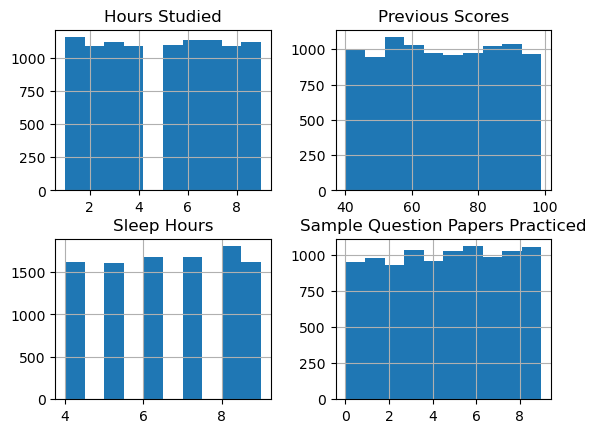

In [6]:
# Histogram
viz = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
viz.hist()
plt.show()

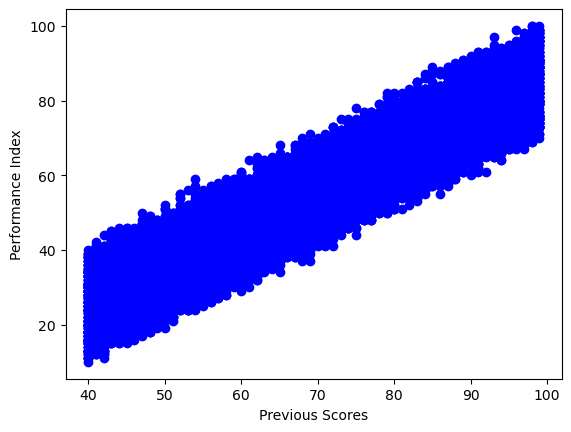

In [7]:
# Scatter Plot
plt.scatter(data['Previous Scores'], data['Performance Index'], color='blue')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

In [8]:
# Split data to train and test
msk = np.random.rand(len(data)) < 0.8 # shuffle rows and split 80/20
train = data[msk]
test = data[~msk]

## Simple Linear Regression

In [9]:
# Fit training data in linear regression model
simple = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Previous Scores']])
train_y = np.asanyarray(train[['Performance Index']])
simple.fit(train_x, train_y)

# Print coefficients (gradient) and Intercept (axis intercept) [y = mx + c]
print('Coefficients: ', simple.coef_)
print('Intercept: ', simple.intercept_)

Coefficients:  [[1.01735416]]
Intercept:  [-15.35686876]


Text(0, 0.5, 'Performance Index')

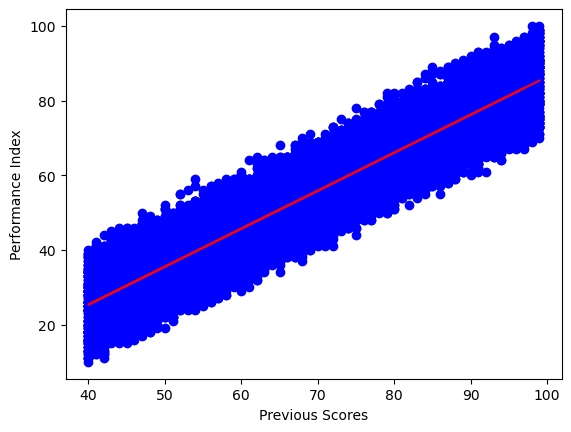

In [10]:
# Regression line in scatter plot
plt.scatter(train['Previous Scores'], train['Performance Index'],  color='blue')
plt.plot(train_x, simple.coef_[0][0]*train_x + simple.intercept_[0], '-r')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

In [11]:
# Evaluation Matrics
test_x = np.asanyarray(test[['Previous Scores']])
test_y = np.asanyarray(test[['Performance Index']])
y_hat = simple.predict(test_y)

print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Mean Squared Error (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2 Score: %.2f" % r2_score(test_y , y_hat))

Mean Absolute Error (MAE): 14.41
Mean Squared Error (MSE): 207.65
R2 Score: 0.41


**An R² score closer to 1 indicates better model performance, so 0.41 indicates that there may be room for improvement in the model’s predictive ability.**

## Mutiple Linear Regression

In [12]:
# Fit training data in multiple linear regression model
multiple = linear_model.LinearRegression()
train_x = train[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
train_y = train['Performance Index']
multiple.fit(train_x, train_y)

# Print coefficients
print('Coefficients: ', multiple.coef_)

Coefficients:  [2.86096734 1.01922774 0.47826625]


In [13]:
# Evaluation matrics
y_hat = multiple.predict(test[['Hours Studied', 'Previous Scores', 'Sleep Hours']])
test_x = test[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
test_y = test['Performance Index']

print("Mean Squared Error (MSE) : %.2f" % np.mean((y_hat - test_y) ** 2))
print('Variance Score: %.2f' % multiple.score(test_x, test_y))

Mean Squared Error (MSE) : 4.36
Variance Score: 0.99


**The closer Variance score is to 1, the better the model captures the variability in the data. A high Variance Score like 0.99 implies that the model predictions are closely aligned with the actual values.**